# 🧪 Quantum Random Number Generator (QRNG)
**Team Members:** Khethiwe Dlamini  
**Date:** 2025-05-18

---

🎯 **Objective:** In this tutorial, we through a quantum experiment called a quantum random number generator (QRNG for short). We will build a QRNG using Qiskit, run it on both a simulator and real IBM Quantum hardware, and then analyze our results with fun visualizations! 

# Step 1: Understanding Randomness
## What is randomness?
Randomness refers to the lack of pattern or predictability. In classical systems, random numbers are often generated using algorithms (pseudo-random), but these can be predicted if the initial conditions (seed) are known (referece).

## Why is quantum randomness special?
In quantum mechanics, certain measurements are fundamentally unpredictable. For example, if we prepare a qubit in a superposition state and measure it, the result is intrinsically random — not due to lack of knowledge, but due to the nature of quantum physics itself (reference).

# Step 2: The Math Behind QRNG
Let’s break this down in simple terms:

A **qubit** has two basis states:  $$\lvert 0 \rangle \quad \text{and} \quad \lvert 1 \rangle $$

Applying a **Hadamard (H) gate** to  $$\lvert 0 \rangle \quad $$  puts it into a **superposition**: 
$$
\lvert 0 \rangle = \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle + \lvert 1 \rangle \right)
$$

When we **measure** this state, quantum mechanics tells us we’ll get:

- 0 with **50% probability**  
- 1 with **50% probability**

Thus, we can use repeated measurements of this superposition to generate **random bits**.

### Common Confusions (Anticipated & Addressed)

| Confusion | Clarification |
|-----------|---------------|
| **“How is this different from a coin toss?”** | A coin toss is classical — it's determined by physics, even if unpredictable in practice. Quantum measurement is inherently probabilistic. |
| **“Why do I need a Hadamard gate?”** | Without it, the qubit stays in state \(\lvert 0 \rangle\). The Hadamard gate creates the necessary superposition for randomness. |
| **“Why do results vary?”** | Quantum randomness is real — each run gives different outcomes. You should expect slightly uneven results due to statistical fluctuations. |
| **“Why does real hardware show bias?”** | Quantum devices are noisy; real-world errors (gate fidelity, decoherence) can skew ideal outcomes slightly. We’ll explore this in the hardware section. |


# Step 3: Let's build the Circuit 🛠️

Installations and Set-up

In [ ]:
%pip install "qiskit<2.0.0" qiskit-aer qiskit-ibm-provider matplotlib

# Imports

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator
from qiskit_ibm_provider import IBMProvider, Session
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Khetiwe Dlamini\AppData\Local\Temp\ipykernel_25736\2670552050.py:3: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  from qiskit_ibm_provider import IBMProvider, Session


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
print("qiskit:", qiskit.__version__)
import qiskit_ibm_provider
print("qiskit-ibm-provider:", qiskit_ibm_provider.__version__)

NameError: name 'qiskit' is not defined

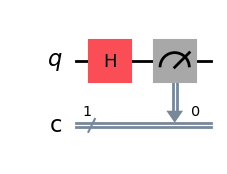

In [ ]:
# Step 1: Create a 1-qubit quantum circuit with 1 classical bit
qc = QuantumCircuit(1, 1)

# Step 2: Apply Hadamard gate to put the qubit in superposition
qc.h(0)

# Step 3: Measure the qubit
qc.measure(0, 0)

# Visualize the circuit
fig = qc.draw('mpl')
plt.show() 

# Executing the Circuit on a Simulator
Let’s test the QRNG on a noiseless simulator.

Measurement results: {'0': 512, '1': 512}


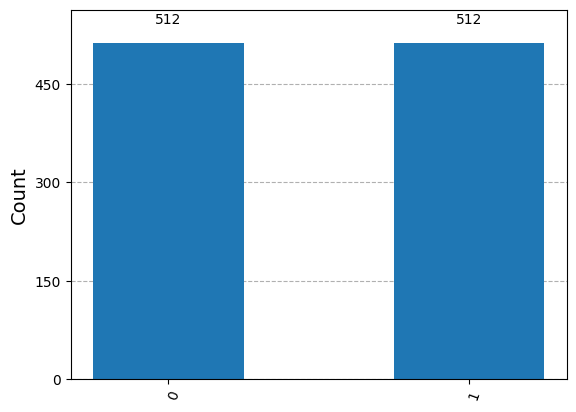

In [ ]:
# Use Aer's simulator
simulator = AerSimulator()

# Assemble and execute the circuit
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit)
result = job.result()

# Get and plot the counts
counts = result.get_counts(qc)
print("Measurement results:", counts)
plot_histogram(counts)
plt.show()

# IBM Quantum Execution

In [ ]:
provider = IBMProvider()
for backend in provider.backends():
    print(backend.name) #Before selecting a backend, always list the available ones for your account

ibm_sherbrooke
ibm_brisbane


In [ ]:
backend = provider.get_backend("ibm_brisbane")
# Build your circuit
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

# Use Sampler primitive
sampler = StatevectorSampler()
result = sampler.run(qc).result()
quasi_dist = result.quasi_dists[0]
# Convert to plain floats:
print({k: round(float(v),2) for k, v in quasi_dist.items()})

{0: 0.4999999999999999, 1: 0.4999999999999999}


C:\Users\Khetiwe Dlamini\AppData\Local\Temp\ipykernel_13660\4131516758.py:9: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()
